In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# игнорировать предупреждения
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('geo_comment_2.csv', delimiter=';', converters={
    'x': lambda x: float(x.replace(',', '.')),
    'y': lambda y: float(y.replace(',', '.'))
})
data = data.drop(data.columns[5], axis=1)
data = data.drop(data.columns[0], axis=1)

In [3]:
scaler = StandardScaler()
data_scaled = data.copy()
for c in data.columns:
  data_scaled[c] = scaler.fit_transform(data[[c]])

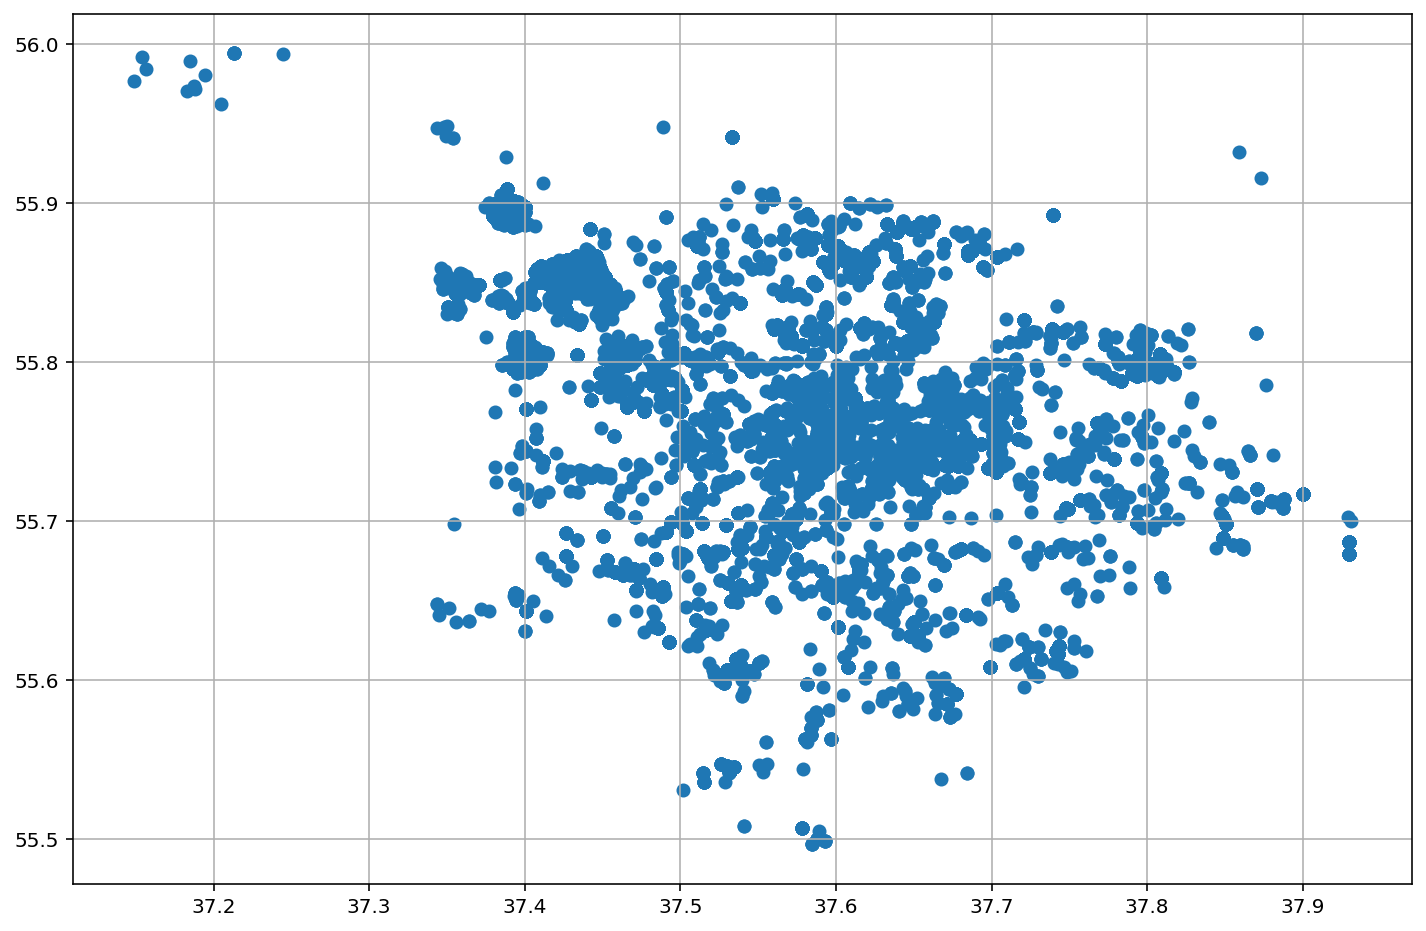

In [4]:
plt.figure(figsize=(12, 8))
plt.scatter(data.x, data.y);
plt.grid()

In [5]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [13]:
algorithms = [
    #AffinityPropagation(),
    KMeans(n_clusters=12),
    AgglomerativeClustering(n_clusters=12),
    DBSCAN(),
]

In [14]:
k_inertia = []
ks = range(1,20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

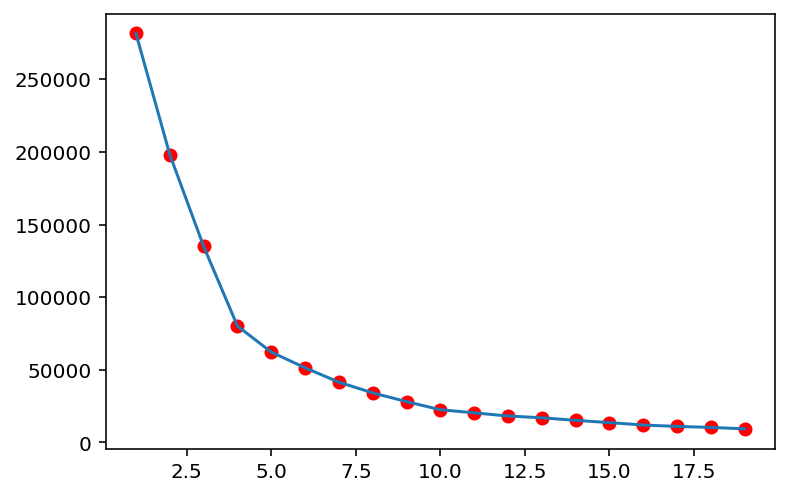

In [15]:
plt.plot(ks, k_inertia, 'ro')
plt.plot(ks, k_inertia);

KeyboardInterrupt: 

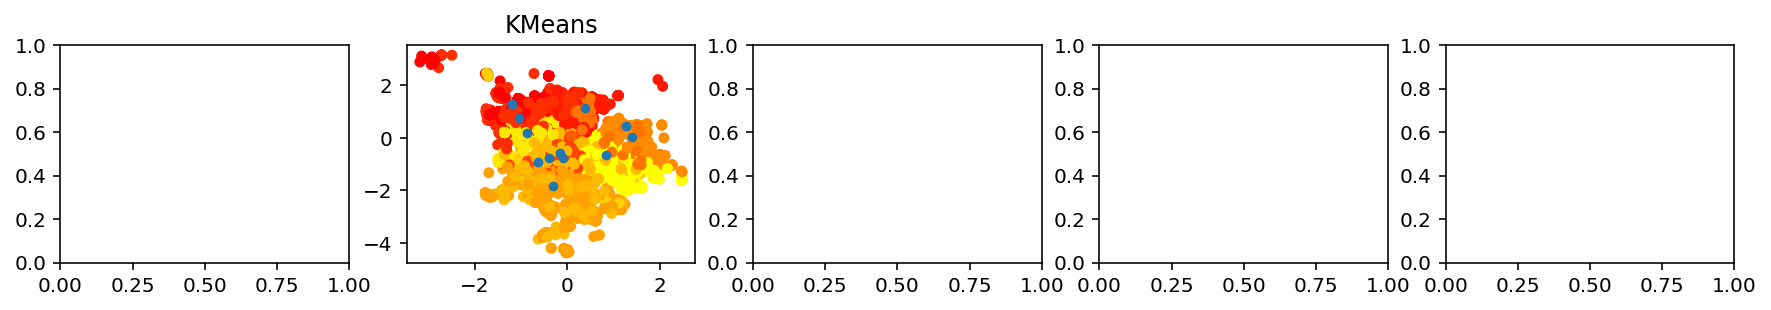

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))

for ax, algorithm in zip(axes[1:], algorithms):
    # кластеризуем и выводим картинку
    clusters = algorithm.fit_predict(data_scaled)
    ax.scatter(data_scaled.x, data_scaled.y, c=clusters, cmap='autumn', s=20)
    ax.set_title(algorithm.__class__.__name__)
    
    # если есть центры кластеров - выведем их
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=15)